Steps:-
0. Preproceess + EDA + Feature Selection
1. Extract input and output cols
2. Scale the valuea
3. Train test split
4. Train the model
5. Evalute the model/model selection
6. Deploy the model

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('placement.csv')

In [24]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [25]:
df.shape

(100, 4)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [27]:
#removing the unamed row
df = df.iloc[:,1:]

In [28]:
#the unamed row is now removed.
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


Text(0, 0.5, 'IQ')

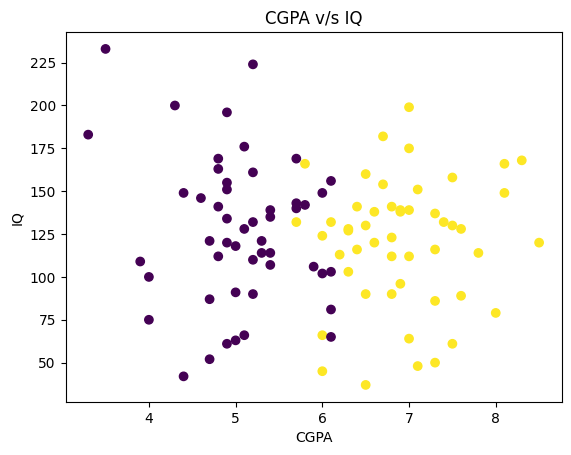

In [33]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])
plt.title('CGPA v/s IQ')
plt.xlabel('CGPA')
plt.ylabel('IQ')